In [14]:

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
#from resizeimage import resizeimage
#import pickle 
#import pyvips
#from pyvips import Image
#import tensorflow as tf
%matplotlib inline

In [6]:
#https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
    #accessed 2023_09_02
# Identify Image Resolutions

root = '/Users/butler/Documents/hp/Classification_of_Indian_clothing_images/data/raw/indian_clothing/val/'
# Get the Image Resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpeg"]
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == ".png"]
imgs = imgs_jpeg + imgs_jpg + imgs_png
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)


In [10]:
# Convert it to Dataframe and compute aspect ratio
img_meta_df_val = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df_val[["Width", "Height"]] = pd.DataFrame(img_meta_df_val["Size"].tolist(), index=img_meta_df_val.index)
img_meta_df_val["Aspect Ratio"] = round(img_meta_df_val["Width"] / img_meta_df_val["Height"], 2)


img_meta_df_val.head()

,FileName,Size,Width,Height,Aspect Ratio
0,2839.jpeg,"(176, 320)",176,320,0.55
1,1716.jpeg,"(98, 320)",98,320,0.31
2,723.jpeg,"(320, 185)",320,185,1.73
3,4514.jpeg,"(320, 96)",320,96,3.33
4,6529.jpeg,"(98, 320)",98,320,0.31


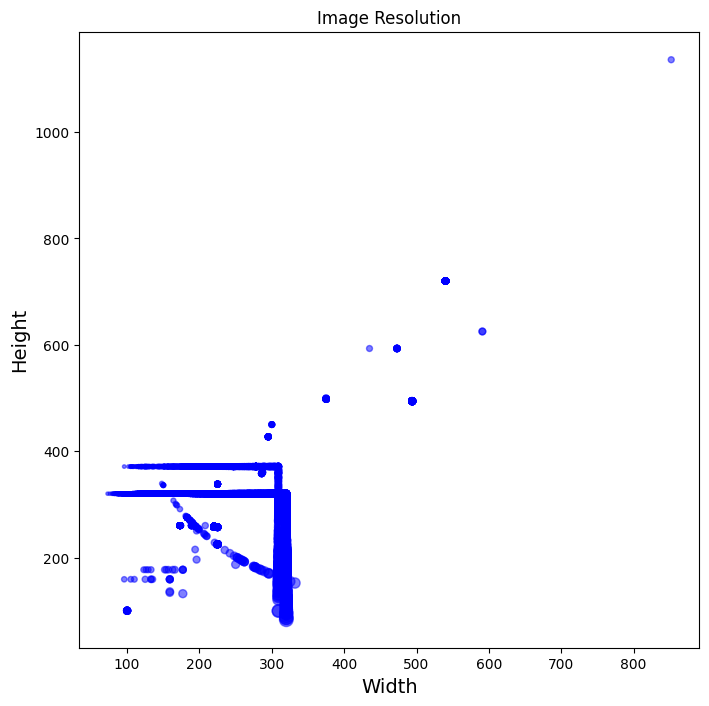

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df_val.Width, img_meta_df_val.Height, color='blue', alpha=0.5, s=img_meta_df_val["Aspect Ratio"]*100, picker=True, marker='.')
_ = ax.set_title("Image Resolution")
_ = ax.set_xlabel("Width", size=14)
_ = ax.set_ylabel("Height", size=14)

In [5]:
img_meta_df[img_meta_df['Height'] > 1000]

,FileName,Size,Width,Height,Aspect Ratio
5772,3861.jpeg,"(852, 1136)",852,1136,0.75


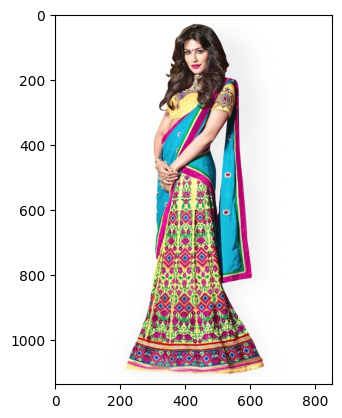

In [15]:
img = Image.open(f'/Users/butler/Documents/hp/Classification_of_Indian_clothing_images/data/raw/indian_clothing/val/3861.jpeg')
plt.imshow(img)

In [42]:
#https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
    #accessed 2023_09_02
# Identify Image Resolutions

root = '/Users/butler/Documents/hp/Classification_of_Indian_clothing_images/data/raw/indian_clothing/test/'
# Get the Image Resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpeg"]
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == ".png"]
imgs = imgs_jpeg + imgs_jpg + imgs_png
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)


In [58]:
# Convert it to Dataframe and compute aspect ratio
img_meta_df_test = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df_test[["Width", "Height"]] = pd.DataFrame(img_meta_df_test["Size"].tolist(), index=img_meta_df_test.index)
img_meta_df_test["Aspect Ratio"] = round(img_meta_df_test["Width"] / img_meta_df_test["Height"], 2)

print(f'Total number of images in the dataset: {len(img_meta_df_test)}')
img_meta_df_test.head()

Total number of images in the dataset: 7496


,FileName,Size,Width,Height,Aspect Ratio
0,2839.jpeg,"(89, 320)",89,320,0.28
1,1716.jpeg,"(280, 320)",280,320,0.88
2,723.jpeg,"(202, 320)",202,320,0.63
3,4514.jpeg,"(320, 129)",320,129,2.48
4,1346.jpeg,"(89, 320)",89,320,0.28


In [56]:
img_meta_df_test.shape

(7496, 5)

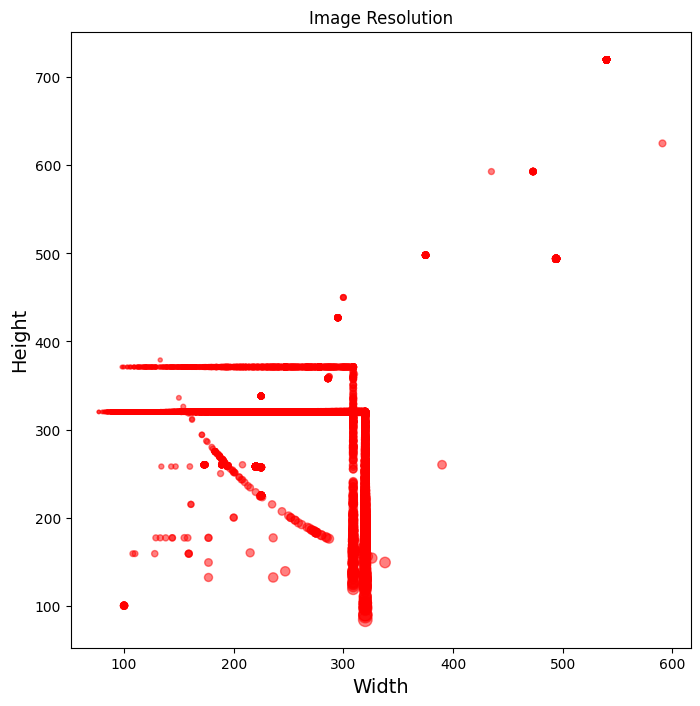

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df_test.Width, img_meta_df_test.Height, color='r', alpha=0.5, s=img_meta_df_test["Aspect Ratio"]*100, picker=True, marker='.')
_ = ax.set_title("Image Resolution")
_ = ax.set_xlabel("Width", size=14)
_ = ax.set_ylabel("Height", size=14)

In [48]:
oversized_h = img_meta_df_test[img_meta_df_test['Height'] > 700]
oversized_h.head()

,FileName,Size,Width,Height,Aspect Ratio
13,5305.jpeg,"(540, 720)",540,720,0.75
17,5755.jpeg,"(540, 720)",540,720,0.75
18,5240.jpeg,"(540, 720)",540,720,0.75
19,2585.jpeg,"(540, 720)",540,720,0.75
21,5610.jpeg,"(540, 720)",540,720,0.75


In [52]:
oversized_h.shape

(1156, 5)

In [53]:
oversized_w = img_meta_df_test[img_meta_df_test['Width'] > 50]
oversized_w.head()

,FileName,Size,Width,Height,Aspect Ratio
0,2839.jpeg,"(89, 320)",89,320,0.28
1,1716.jpeg,"(280, 320)",280,320,0.88
2,723.jpeg,"(202, 320)",202,320,0.63
3,4514.jpeg,"(320, 129)",320,129,2.48
4,1346.jpeg,"(89, 320)",89,320,0.28


In [54]:
oversized_w.shape

(7496, 5)

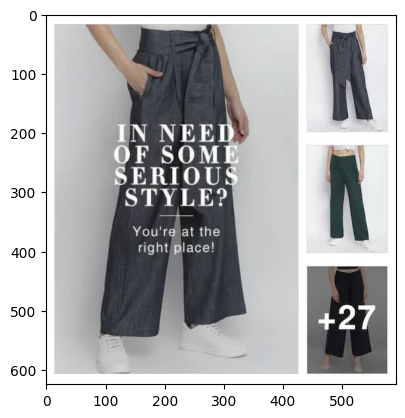

In [36]:
img = Image.open(f'/Users/butler/Documents/hp/Classification_of_Indian_clothing_images/data/raw/indian_clothing/test/5649.jpg')
plt.imshow(img)

In [ ]:
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
predictions = probability_model.predict(test_images)


In [ ]:
np.argmax(predictions[0])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()